In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
import pandas as pd

df_house = pd.read_csv (r'C:\Users\pc\Documents\kc_house_data.csv', sep = ',')
print (df_house)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [5]:
column_names = df_house.columns
for column in column_names:
    print(column + ' - ' + str(df_house[column].isnull().sum()))

id - 0
date - 0
price - 0
bedrooms - 0
bathrooms - 0
sqft_living - 0
sqft_lot - 0
floors - 0
waterfront - 0
view - 0
condition - 0
grade - 0
sqft_above - 0
sqft_basement - 0
yr_built - 0
yr_renovated - 0
zipcode - 0
lat - 0
long - 0
sqft_living15 - 0
sqft_lot15 - 0


In [6]:
# the most important feature in the dataset will be the correlation between the price and the zipcode
# as it shows that the price is different from place to place.

In [7]:
df_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [9]:
x = df_house[["floors"]]
y = df_house["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)

model = LinearRegression()   
model.fit(x_train,y_train)  
predicted = model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 117739516244.41722
R squared 0.060686744896014666


In [10]:
x_group = df_house[["price", "floors"]].groupby(['floors'], as_index=False).mean()

In [11]:
x

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


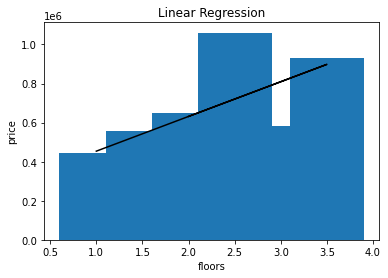

In [12]:
import seaborn as sns
plt.bar(x=x_group["floors"],height=x_group["price"])
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("floors")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [13]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
  scoring = {'accuracy': make_scorer(accuracy_score),
            'prec': 'precision'}
from custom_scorer_module import custom_scoring_function 
     cross_val_score(model,
  X_test,
  y_test,
  scoring = make_scorer(custom_scoring_function, greater_is_better = False),
  cv = 5,
  n_jobs = -1)

IndentationError: unexpected indent (<ipython-input-28-accefd9f40f3>, line 3)

In [23]:
x = df_house[["id","price"]]  
y = df_house["floors"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=40) 

model = LinearRegression() 
model.fit(x_train,y_train)
predicted = model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.2696300080500334
R squared 0.06768850850154451


In [26]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('df_house',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1)

SyntaxError: unexpected EOF while parsing (<ipython-input-26-34dd430fc5e6>, line 7)

In [27]:
poly_pred = df_house.predict(x.reshape(-1,1))

sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

plt.figure(figsize = (10,6))
plt.scatter(x,y,s = 15)
plt.plot(x,y_pred,color ='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('floors',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'predict'